In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
sns.set()

In [3]:
data1 = pd.read_csv("sat_gpa.csv")

In [4]:
data1.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [5]:
x = data1['SAT']
y = data1['GPA']

In [6]:
x.shape

(84,)

In [7]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [8]:
reg = LinearRegression()

In [9]:
reg.fit(x_matrix,y)

LinearRegression()

In [10]:
# R-squared
reg.score(x_matrix,y)

0.40600391479679765

In [11]:
reg.coef_

array([0.00165569])

In [12]:
reg.intercept_

0.27504029966028076

In [13]:
reg.predict([[1740]])

array([3.15593751])

In [14]:
new_data = pd.DataFrame({'SAT':[1700, 1670]})
new_data

,SAT
0,1700
1,1670


In [15]:
new_data['Predicted GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted GPA
0,1700,3.089710
1,1670,3.040039


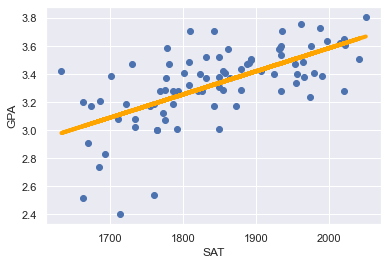

In [16]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x, yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

### Formula for Adjusted R-squared

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [17]:
x_matrix.shape

(84, 1)

In [18]:
r2 = reg.score(x_matrix, y)
n = x_matrix.shape[0]
p = x_matrix.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.3987600600991976

### Feature Selection

In [19]:
from sklearn.feature_selection import f_regression

In [21]:
f_regression(x_matrix,y)
# menghasilkan F-statistics dan p-values

(array([56.04804786]), array([7.19951844e-11]))

In [27]:
p_values = f_regression(x_matrix, y)[1]
p_values

array([7.19951844e-11])

### Summary

In [31]:
reg_summary = pd.DataFrame(data = ['SAT'], columns = ['Features'])
reg_summary

,Features
0,SAT


In [33]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001656,7.199518e-11


### Standardization

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [37]:
scaler.fit(x_matrix)

StandardScaler()

In [38]:
x_scaled = scaler.transform(x_matrix)

In [39]:
x_scaled

array([[-1.26338288],
       [-1.74458431],
       [-0.82067757],
       [-1.54247971],
       [-1.46548748],
       [-1.68684014],
       [-0.78218146],
       [-0.78218146],
       [-0.51270866],
       [ 0.04548499],
       [-1.06127829],
       [-0.67631715],
       [-1.06127829],
       [-1.28263094],
       [-0.6955652 ],
       [ 0.25721362],
       [-0.86879772],
       [-1.64834403],
       [-0.03150724],
       [-0.57045283],
       [-0.81105355],
       [-1.18639066],
       [-1.75420834],
       [-1.52323165],
       [ 1.23886453],
       [-0.18549169],
       [-0.5608288 ],
       [-0.23361183],
       [ 1.68156984],
       [-0.4934606 ],
       [-0.73406132],
       [ 0.85390339],
       [-0.67631715],
       [ 0.09360513],
       [ 0.33420585],
       [ 0.03586096],
       [-0.35872421],
       [ 1.04638396],
       [-0.65706909],
       [-0.13737155],
       [ 0.18984542],
       [ 0.04548499],
       [ 1.1618723 ],
       [-1.37887123],
       [ 1.39284898],
       [ 0

In [40]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression()

In [41]:
reg.coef_

array([0.1720369])

In [42]:
reg.intercept_

3.330238095238095

In [45]:
reg_summary = pd.DataFrame([['Intercept'], ['SAT']], columns = ['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0]
reg_summary

,Features,Weights
0,Intercept,3.330238
1,SAT,0.172037


In [46]:
new_data = pd.DataFrame(data = [[1700], [1800]], columns = ['SAT'])
new_data

,SAT
0,1700
1,1800


In [47]:
reg.predict(new_data)

array([295.79297173, 312.99666194])

In [48]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928],
       [-0.43571643]])

In [49]:
reg.predict(new_data_scaled)

array([3.08970998, 3.25527879])